# Object Detection

## Libraries

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from matplotlib import gridspec

from skimage import io
from skimage import color
from skimage import transform
from skimage import feature


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Sliding Window

The sliding window is the simplest way to detect object in image. This method is still used nowadays because of it's simplicity.

![sliding window](https://www.pyimagesearch.com/wp-content/uploads/2014/10/sliding_window_example.gif)

At each step, a part of the image is selectionned (the _window_) and we will ask to our classifier to classify is (eg. face vs. non face). 

The window is sliding because she move from one side to another and top to bottom.



In [2]:
def sliding_window(img, size, step=1):
    """Sliding window.
    
    :param img:  the image to process
    :param size: size of the window to extract
    :param step: return 1 window each n step
    
    :type img:  np.array
    :type size: tuple
    :type step: int
    
    :yield: sub region of the size defined in parameter 
    ofthe image at the x, y coordiate.
    """
    yy, xx = img.shape[0], img.shape[1]
    for y in range(0, yy, step):
        for x in range(0, xx, step):
            yield (x, y, img[y:y + size[1], x:x + size[0]])

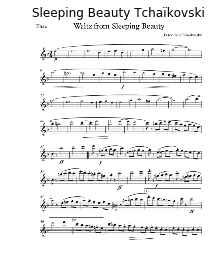

In [3]:
sleeping_beauty_img = io.imread("imgs/sleeping_beauty.png", as_grey=True)

plt.title("Sleeping Beauty Tchaïkovski")
plt.axis("off")
plt.imshow(sleeping_beauty_img, cmap="gray")
plt.show()

running the sliding window function...


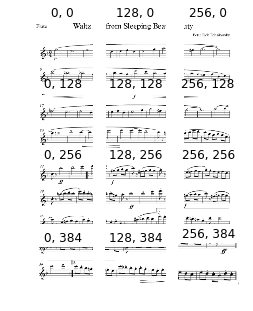

In [4]:
print("running the sliding window function...")

fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(4, 4)

gen = sliding_window(sleeping_beauty_img, size=(128, 128), step=128)

for i in range(4):
    for j in range(3):
        x, y, window = gen.__next__()
        ax = fig.add_subplot(gs[i, j])
        ax.set_title("{}, {}".format(x, y))
        ax.axis('off')
        ax.imshow(window, cmap='gray')

fig.show()

## Image Pyramid

Accordingly to the skimage documentation : 

```
The pyramid_gaussian function takes an image and yields successive images shrunk by a constant scale factor. Image pyramids are often used, e.g., to implement algorithms for denoising, texture discrimination, and scale-invariant detection.
```

![exemple of pyramid](http://scikit-image.org/docs/dev/_images/sphx_glr_plot_pyramid_001.png)

Indeed without sliding our window on different scale factor we could miss the object we want to detect as illustrated bellow : 

![exemple of why pyramid is usefull](https://www.researchgate.net/profile/Jordi_Gonzalez/publication/221259067/figure/fig1/AS:305448159858691@1449835924135/HOG-feature-pyramid-It-is-used-for-both-Scale-space-search-green-dashed-detection.png)


Here is the [link](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.pyramid_gaussian) to the image pyramid documentation.

Display the image at different scale factor :


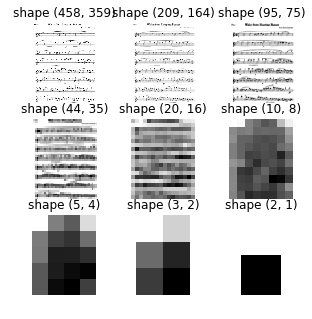

In [5]:
print("Display the image at different scale factor :")

fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(3, 3)

pyramid_gen = transform.pyramid_gaussian(sleeping_beauty_img, downscale=2.2)

for i in range(3):
    for j in range(3):
        current_pyramid_img = pyramid_gen.__next__()
        ax = fig.add_subplot(gs[i, j])
        ax.set_title("shape {}".format(str(current_pyramid_img.shape)))
        ax.axis('off')
        ax.imshow(current_pyramid_img, cmap='gray')

fig.show()

## Template Matching

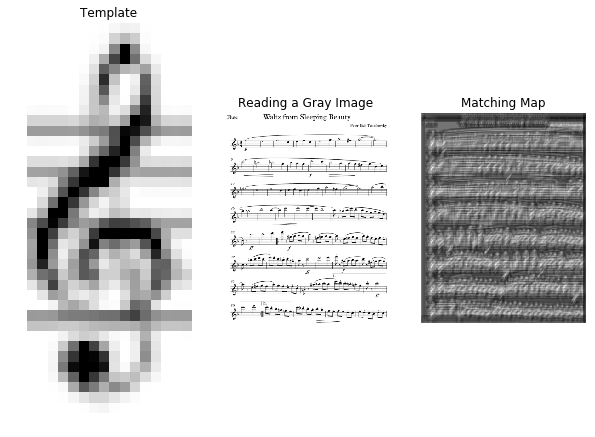

In [6]:
template = io.imread("imgs/clef.png", as_grey=True)

#use the sklearn template matching function
score_match_map = feature.match_template(
    sleeping_beauty_img, 
    template,
    pad_input=True
)

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 3)

ax = fig.add_subplot(gs[0, 0])
ax.set_title("Template")
ax.axis('off')
ax.imshow(template, cmap='gray')

ax = fig.add_subplot(gs[0, 1])
ax.set_title("Reading a Gray Image")
ax.axis('off')
ax.imshow(sleeping_beauty_img, cmap='gray')


ax = fig.add_subplot(gs[0, 2])
ax.set_title("Matching Map")
ax.axis('off')
ax.imshow(score_match_map, cmap='gray')

fig.show()


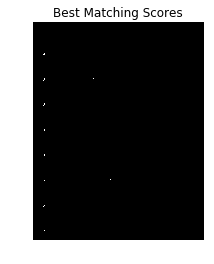

In [7]:
score_match_map = feature.match_template(sleeping_beauty_img, template, pad_input=True)
thresh = 0.38 #select a thershold to better see the potential matched points
res = score_match_map > thresh

plt.title("Best Matching Scores")
plt.axis("off")
plt.imshow(res, cmap='gray')
plt.show()

## Non Maximum Suppression

There is an issue with the sliding window method. Indeed, as the window can overlap the object in different way the classifier could detect it several times as we can see in the example bellow.

![non maximum suppression example](https://raw.githubusercontent.com/tejaslodaya/car-detection-yolo/master/nb_images/non-max-suppression.png)


To solve this problem we can apply an opperation like the _non maximum suppression_. Consider a matrix containing at each point the score of the classifier, we want to ignore all the duplicate. Also we will ignore all the score which are detected if there are not the maximum score in the local area.

This can be done as bellow :

![exemple nms](https://www.researchgate.net/profile/Alexander_Wong7/publication/51805991/figure/fig6/AS:213387507179554@1427886954953/Illustrative-example-of-non-maximum-suppression-strategy-Scanning-through-the-set-of.png)

__Excercice__: _Implement the non maximum suppression algorithm on this small example._

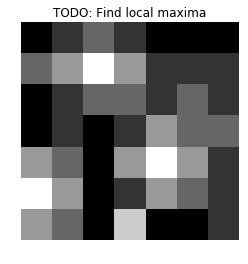

In [8]:
img = np.array([
    [1, 2, 3, 2, 1, 1, 1],
    [3, 4, 6, 4, 2, 2, 2],
    [1, 2, 3, 3, 2, 3, 2],
    [1, 2, 1, 2, 4, 3, 3],
    [4, 3, 1, 4, 6, 4, 2],
    [6, 4, 1, 2, 4, 3, 2],
    [4, 3, 1, 5, 1, 1, 2]
])

plt.title("TODO: Find local maxima")
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
#TODO: exercice